In [15]:
import os

from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS


In [16]:
def load_movies(path="../data/raw/"):
    corpus = []
    classes = []
    label = 0
    for cl in os.listdir(path):  # parcours des fichiers d'un répertoire
        print(cl)
        for f in os.listdir(path + cl):
            txt = open(path + cl + "/" + f).read()
            corpus.append(txt)
            classes.append(label)
        label += 1  # changer de répertoire <=> changement de classe
    return corpus, classes

alltxts, alllabels = load_movies()

neg
pos


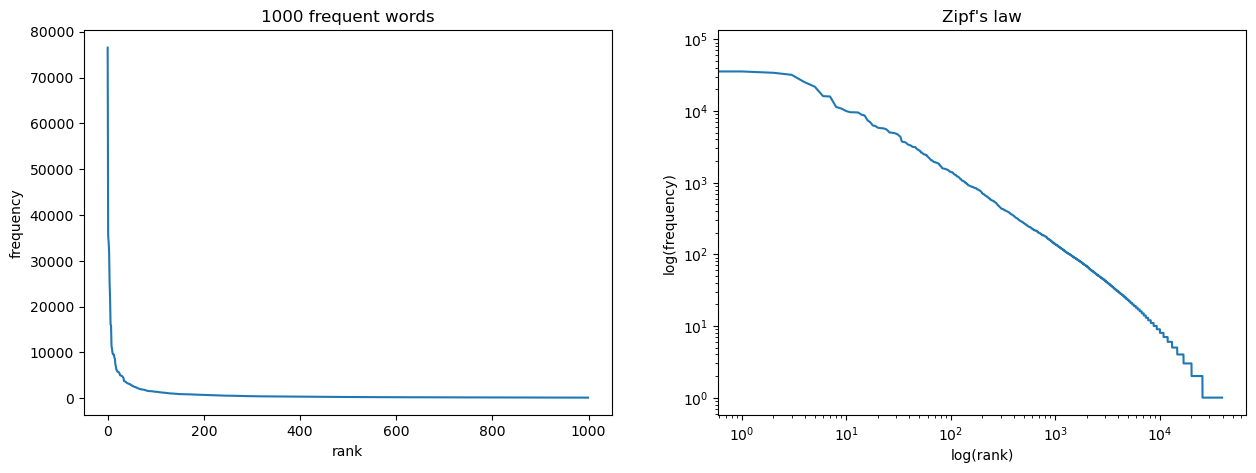

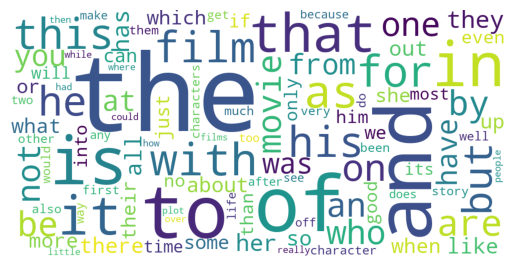

20 most frequent words
the     76529
and     35576
of      34123
to      31937
is      25195
in      21822
it      16107
that    15924
as      11378
with    10792
for      9961
his      9587
this     9578
film     9517
he       8864
but      8634
on       7385
are      6949
by       6261
be       6174
dtype: int64
39659
1259869


In [31]:


## BoW (without stopwords)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(np.array(X.sum(axis=0))[0], index = sorted(vectorizer.vocabulary_))

## Zipf's law
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(range(1000), frequent_words.sort_values(ascending=False)[:1000], "-")
plt.ylabel("frequency")
plt.xlabel("rank")
plt.title("1000 frequent words")
plt.subplot(122)
plt.plot(frequent_words.sort_values(ascending=False))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title("Zipf's law")
plt.savefig("./figures/zipfs_nostopwords", dpi=100, bbox_inches="tight")
plt.show()

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud.generate_from_frequencies(frequent_words)
wordcloud.to_file("./figures/wordclouds_nostopwords.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])
print(len(frequent_words))
print(sum(frequent_words))

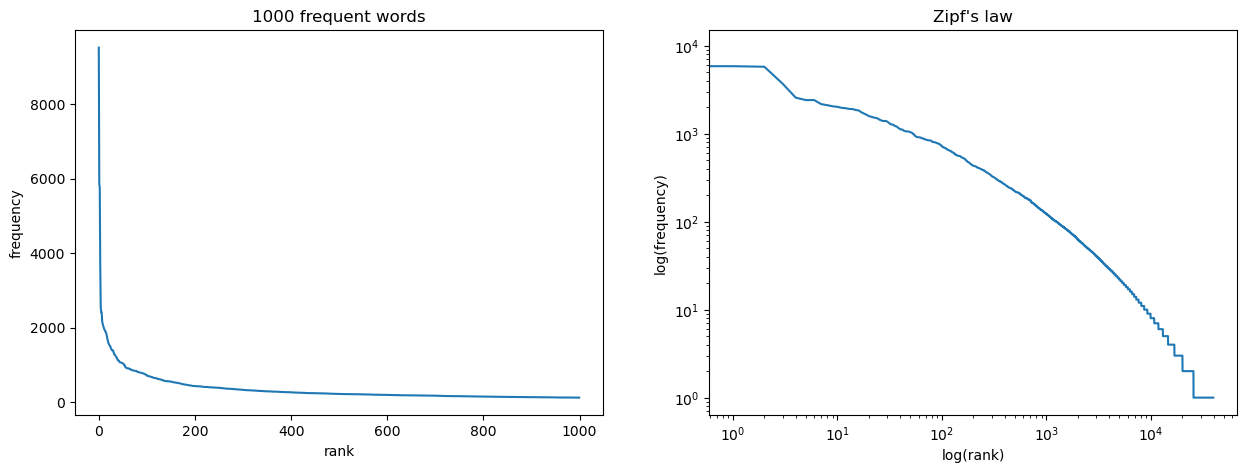

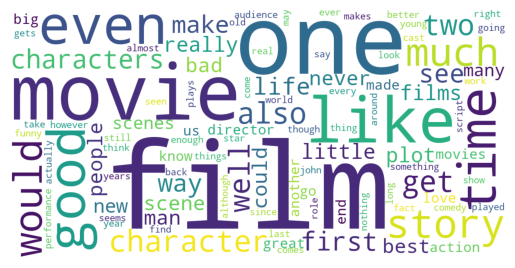

20 most frequent words
film          9517
one           5852
movie         5771
like          3690
even          2565
good          2411
time          2411
story         2169
would         2109
much          2049
character     2020
also          1967
get           1949
two           1911
well          1906
characters    1859
first         1836
see           1749
way           1693
make          1642
dtype: int64
39516
705191


In [32]:
## BoW (with stopwords)
vectorizer = CountVectorizer(stop_words=stopwords.words("english"))
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(np.array(X.sum(axis=0))[0], index = sorted(vectorizer.vocabulary_))

## Zipf's law
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(range(1000), frequent_words.sort_values(ascending=False)[:1000], "-")
plt.ylabel("frequency")
plt.xlabel("rank")
plt.title("1000 frequent words")
plt.subplot(122)
plt.plot(frequent_words.sort_values(ascending=False))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title("Zipf's law")
plt.savefig("./figures/zipfs_stopwords", dpi=100, bbox_inches="tight")
plt.show()

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud.generate_from_frequencies(frequent_words)
wordcloud.to_file("./figures/wordclouds_stopwords.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])
print(len(frequent_words))
print(sum(frequent_words))

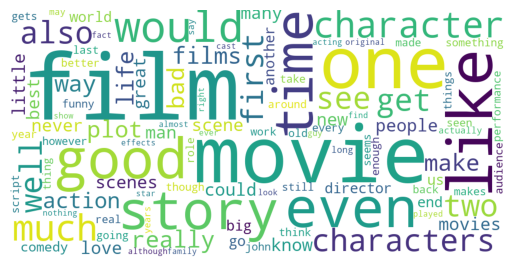

20 most frequent words
film          94.776457
movie         69.440722
one           58.367937
like          42.381739
good          33.671199
even          32.840233
time          31.738260
story         31.595583
would         29.604733
character     28.856107
much          28.830202
characters    28.613222
well          28.386558
get           28.312270
also          28.107170
two           27.654183
see           26.822706
first         26.477543
really        26.153078
life          26.064001
dtype: float64


In [20]:
## BoW (with stopwords + tf-idf)
sw = stopwords.words("english")
vectorizer = TfidfVectorizer(stop_words=sw)
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(np.array(X.sum(axis=0))[0], index = sorted(vectorizer.vocabulary_))

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud.generate_from_frequencies(frequent_words)
wordcloud.to_file("./figures/wordclouds_stopwords_tfidf.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])

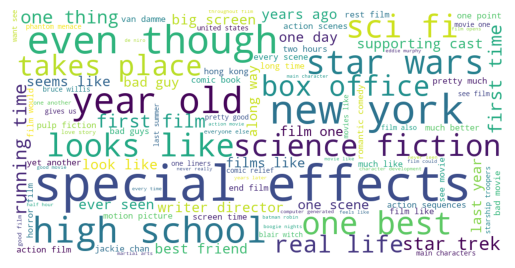

20 most frequent words
special effects    387
new york           249
even though        222
year old           192
high school        188
star wars          166
looks like         146
science fiction    144
sci fi             144
one best           144
takes place        123
real life          122
box office         122
star trek          120
one thing          120
first film         117
first time         115
supporting cast    112
running time       112
look like          111
dtype: int64


In [26]:
## BoW (with stopwords)
vectorizer = CountVectorizer(stop_words=stopwords.words("english"), ngram_range=(2,2))
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(np.array(X.sum(axis=0))[0], index = sorted(vectorizer.vocabulary_))

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud.generate_from_frequencies(frequent_words)
wordcloud.to_file("../reports/figures/wordcloud_stopwords_2grams.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])

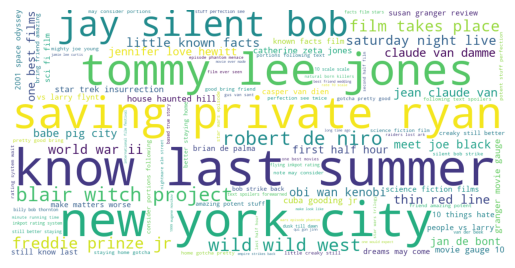

20 most frequent words
know last summer       59
new york city          53
tommy lee jones        44
saving private ryan    43
jay silent bob         39
blair witch project    36
robert de niro         35
wild wild west         31
freddie prinze jr      27
film takes place       26
saturday night live    26
world war ii           25
thin red line          24
little known facts     24
jean claude van        22
claude van damme       22
meet joe black         21
obi wan kenobi         21
babe pig city          20
one best films         20
dtype: int64


In [27]:
## BoW (with stopwords)
vectorizer = CountVectorizer(stop_words=stopwords.words("english"), ngram_range=(3,3))
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(np.array(X.sum(axis=0))[0], index = sorted(vectorizer.vocabulary_))

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud.generate_from_frequencies(frequent_words)
wordcloud.to_file("../reports/figures/wordcloud_stopwords_3grams.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])

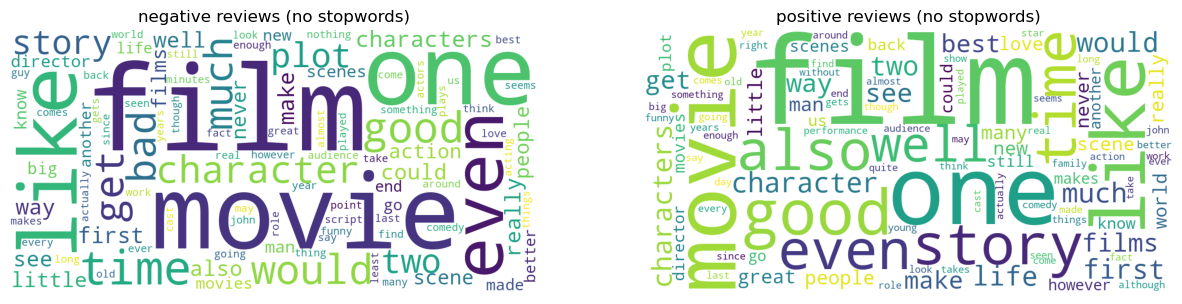

20 most frequent words
film          4287
movie         3246
one           2800
like          1888
even          1386
time          1168
good          1163
would         1090
get           1052
bad           1034
much          1011
character      942
story          923
plot           917
two            912
characters     873
make           851
first          832
could          791
see            784
dtype: int64
film          5230
one           3052
movie         2525
like          1802
good          1248
story         1246
time          1243
also          1200
even          1179
well          1123
character     1078
life          1057
much          1038
would         1019
first         1004
two            999
characters     986
see            965
way            929
get            897
dtype: int64


In [21]:
## BoW (with stopwords)
vectorizer0 = CountVectorizer(stop_words=stopwords.words("english"))
X0 = vectorizer0.fit_transform(np.array(alltxts)[np.array(alllabels) == 0])
frequent_words0 = pd.Series(np.array(X0.sum(axis=0))[0], index = sorted(vectorizer0.vocabulary_))

vectorizer1 = CountVectorizer(stop_words=stopwords.words("english"))
X1 = vectorizer1.fit_transform(np.array(alltxts)[np.array(alllabels) == 1])
frequent_words1 = pd.Series(np.array(X1.sum(axis=0))[0], index = sorted(vectorizer1.vocabulary_))

## 100 most frequent words
wordcloud0 = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud0.generate_from_frequencies(frequent_words0)
wordcloud0.to_file("./figures/wordclouds_neg_nostopwords.png")
wordcloud1 = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud1.generate_from_frequencies(frequent_words1)
wordcloud1.to_file("./figures/wordclouds_pos_nostopwords.png")

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(wordcloud0)
plt.title("negative reviews (no stopwords)")
plt.axis("off")
plt.subplot(122)
plt.imshow(wordcloud1)
plt.axis("off")
plt.title("positive reviews (no stopwords)")
plt.show()

## 
print("20 most frequent words")
print(frequent_words0.sort_values(ascending=False)[:20])
print(frequent_words1.sort_values(ascending=False)[:20])

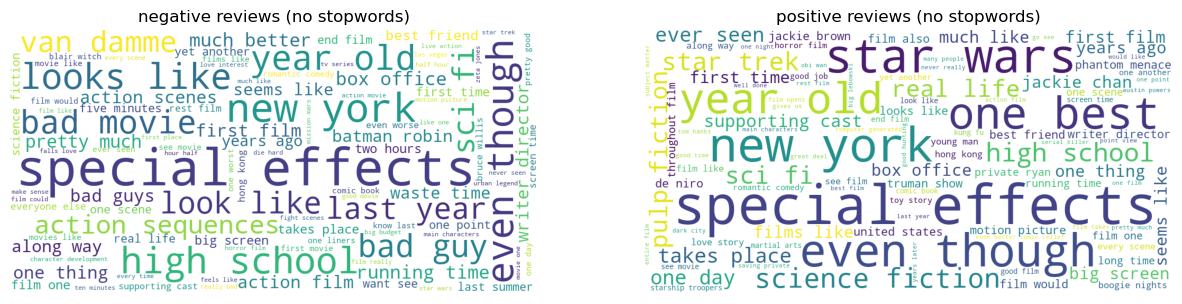

20 most frequent words
special effects     208
new york            118
even though         102
high school          99
looks like           92
year old             86
bad movie            76
bad guy              72
look like            70
last year            67
van damme            66
sci fi               66
action sequences     64
running time         63
box office           62
much better          62
pretty much          60
one thing            58
action scenes        58
action film          57
dtype: int64
special effects    179
star wars          132
new york           131
even though        120
one best           115
year old           106
science fiction     96
high school         89
star trek           85
pulp fiction        78
sci fi              78
real life           73
takes place         72
one day             69
ever seen           68
supporting cast     68
first time          65
one thing           62
jackie chan         61
box office          60
dtype: int64


In [28]:
## BoW (with stopwords)
vectorizer0 = CountVectorizer(stop_words=stopwords.words("english"), ngram_range=(2,2))
X0 = vectorizer0.fit_transform(np.array(alltxts)[np.array(alllabels) == 0])
frequent_words0 = pd.Series(np.array(X0.sum(axis=0))[0], index = sorted(vectorizer0.vocabulary_))

vectorizer1 = CountVectorizer(stop_words=stopwords.words("english"), ngram_range=(2,2))
X1 = vectorizer1.fit_transform(np.array(alltxts)[np.array(alllabels) == 1])
frequent_words1 = pd.Series(np.array(X1.sum(axis=0))[0], index = sorted(vectorizer1.vocabulary_))

## 100 most frequent words
wordcloud0 = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud0.generate_from_frequencies(frequent_words0)
wordcloud0.to_file("./figures/wordclouds_neg_nostopwords_2grams.png")
wordcloud1 = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud1.generate_from_frequencies(frequent_words1)
wordcloud1.to_file("./figures/wordclouds_pos_nostopwords_2grams.png")

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(wordcloud0)
plt.title("negative reviews (no stopwords)")
plt.axis("off")
plt.subplot(122)
plt.imshow(wordcloud1)
plt.axis("off")
plt.title("positive reviews (no stopwords)")
plt.show()

## 
print("20 most frequent words")
print(frequent_words0.sort_values(ascending=False)[:20])
print(frequent_words1.sort_values(ascending=False)[:20])

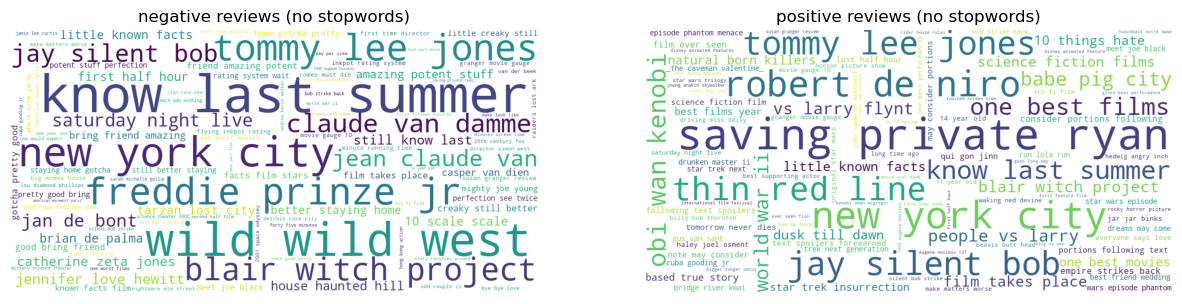

20 most frequent words
know last summer        39
wild wild west          31
new york city           24
tommy lee jones         22
freddie prinze jr       22
blair witch project     21
jay silent bob          17
jean claude van         17
saturday night live     17
claude van damme        17
jennifer love hewitt    16
jan de bont             16
catherine zeta jones    14
still know last         14
house haunted hill      13
tarzan lost city        12
10 scale scale          12
little known facts      12
brian de palma          12
first half hour         12
dtype: int64
saving private ryan      39
new york city            29
robert de niro           26
jay silent bob           22
tommy lee jones          22
thin red line            21
know last summer         20
obi wan kenobi           19
one best films           19
world war ii             18
babe pig city            18
people vs larry          16
vs larry flynt           16
film takes place         15
blair witch project      15
scie

In [29]:
## BoW (with stopwords)
vectorizer0 = CountVectorizer(stop_words=stopwords.words("english"), ngram_range=(3,3))
X0 = vectorizer0.fit_transform(np.array(alltxts)[np.array(alllabels) == 0])
frequent_words0 = pd.Series(np.array(X0.sum(axis=0))[0], index = sorted(vectorizer0.vocabulary_))

vectorizer1 = CountVectorizer(stop_words=stopwords.words("english"), ngram_range=(3,3))
X1 = vectorizer1.fit_transform(np.array(alltxts)[np.array(alllabels) == 1])
frequent_words1 = pd.Series(np.array(X1.sum(axis=0))[0], index = sorted(vectorizer1.vocabulary_))

## 100 most frequent words
wordcloud0 = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud0.generate_from_frequencies(frequent_words0)
wordcloud0.to_file("./figures/wordclouds_neg_nostopwords_3grams.png")
wordcloud1 = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud1.generate_from_frequencies(frequent_words1)
wordcloud1.to_file("./figures/wordclouds_pos_nostopwords_3grams.png")

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(wordcloud0)
plt.title("negative reviews (no stopwords)")
plt.axis("off")
plt.subplot(122)
plt.imshow(wordcloud1)
plt.axis("off")
plt.title("positive reviews (no stopwords)")
plt.show()

## 
print("20 most frequent words")
print(frequent_words0.sort_values(ascending=False)[:20])
print(frequent_words1.sort_values(ascending=False)[:20])

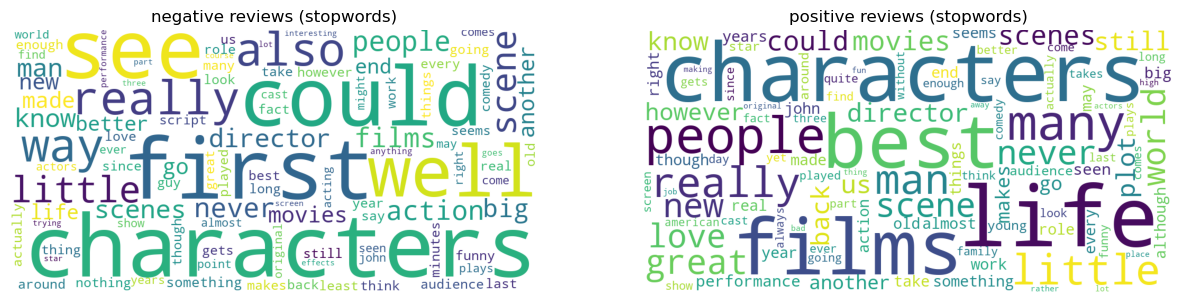

20 most frequent words
characters    873
first         832
could         791
see           784
well          783
really        781
also          767
way           764
little        726
scene         670
people        666
never         653
films         652
action        652
director      651
know          645
scenes        636
man           632
big           597
movies        571
dtype: int64
life          1057
characters     986
films          884
best           829
people         789
many           780
really         777
little         775
man            764
great          751
scene          727
new            723
never          721
world          665
love           661
scenes         638
could          636
movies         635
plot           596
us             588
dtype: int64


In [22]:
## BoW (with stopwords)
vectorizer0 = CountVectorizer(stop_words=sw, max_df=0.5)
X0 = vectorizer0.fit_transform(np.array(alltxts)[np.array(alllabels) == 0])
frequent_words0 = pd.Series(np.array(X0.sum(axis=0))[0], index = sorted(vectorizer0.vocabulary_))

vectorizer1 = CountVectorizer(stop_words=sw, max_df=0.5)
X1 = vectorizer1.fit_transform(np.array(alltxts)[np.array(alllabels) == 1])
frequent_words1 = pd.Series(np.array(X1.sum(axis=0))[0], index = sorted(vectorizer1.vocabulary_))

## 100 most frequent words
wordcloud0 = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud0.generate_from_frequencies(frequent_words0)
wordcloud0.to_file("./figures/wordclouds_neg_nostopwords.png")
wordcloud1 = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud1.generate_from_frequencies(frequent_words1)
wordcloud1.to_file("./figures/wordclouds_pos_stopwords.png")

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(wordcloud0)
plt.title("negative reviews (stopwords)")
plt.axis("off")


plt.subplot(122)
plt.imshow(wordcloud1)
plt.axis("off")
plt.title("positive reviews (stopwords)")
plt.show()

## 
print("20 most frequent words")
print(frequent_words0.sort_values(ascending=False)[:20])
print(frequent_words1.sort_values(ascending=False)[:20])

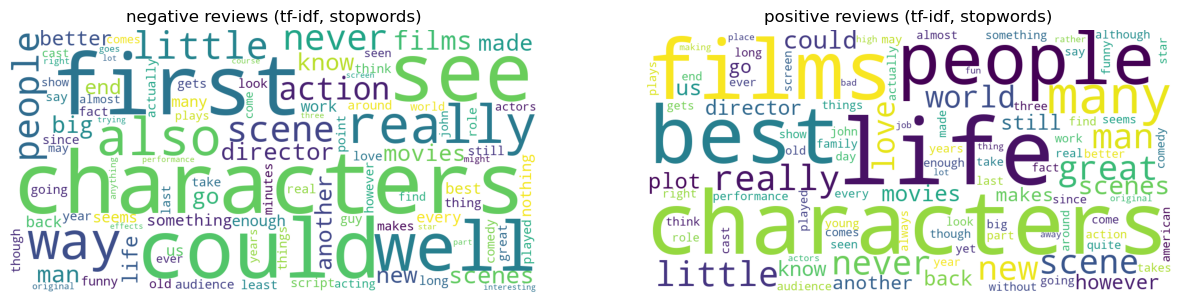

20 most frequent words
characters    873
first         832
could         791
see           784
well          783
really        781
also          767
way           764
little        726
scene         670
people        666
never         653
films         652
action        652
director      651
know          645
scenes        636
man           632
big           597
movies        571
dtype: int64
life          1057
characters     986
films          884
best           829
people         789
many           780
really         777
little         775
man            764
great          751
scene          727
new            723
never          721
world          665
love           661
scenes         638
could          636
movies         635
plot           596
us             588
dtype: int64


In [30]:
## BoW (with stopwords)
vectorizer0 = CountVectorizer(stop_words=sw, max_df=0.5)
X0 = vectorizer0.fit_transform(np.array(alltxts)[np.array(alllabels) == 0])
frequent_words0 = pd.Series(np.array(X0.sum(axis=0))[0], index = sorted(vectorizer0.vocabulary_))

vectorizer1 = CountVectorizer(stop_words=sw, max_df=0.5)
X1 = vectorizer1.fit_transform(np.array(alltxts)[np.array(alllabels) == 1])
frequent_words1 = pd.Series(np.array(X1.sum(axis=0))[0], index = sorted(vectorizer1.vocabulary_))

## 100 most frequent words
wordcloud0 = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud0.generate_from_frequencies(frequent_words0)
wordcloud0.to_file("./figures/wordclouds_neg_stopwords_tfidf.png")
wordcloud1 = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud1.generate_from_frequencies(frequent_words1)
wordcloud1.to_file("./figures/wordclouds_pos_stopwords_tfidf.png")

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(wordcloud0)
plt.title("negative reviews (tf-idf, stopwords)")
plt.axis("off")


plt.subplot(122)
plt.imshow(wordcloud1)
plt.axis("off")
plt.title("positive reviews (tf-idf, stopwords)")
plt.show()

## 
print("20 most frequent words")
print(frequent_words0.sort_values(ascending=False)[:20])
print(frequent_words1.sort_values(ascending=False)[:20])

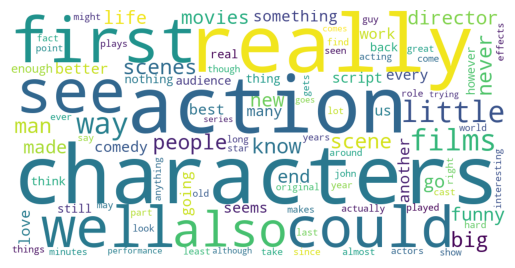

In [24]:
plt.imshow(wordcloud0)
plt.axis("off")
plt.savefig("wordcloud_review_class0.png")

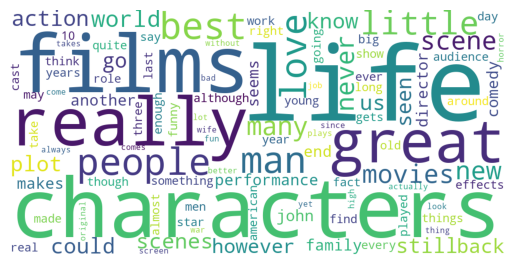

In [25]:
plt.imshow(wordcloud1)
plt.axis("off")
plt.savefig("wordcloud_review_class1.png")